# Capstone 2: Biodiversity Project

# Introduction
You are a biodiversity analyst working for the National Parks Service.  You're going to help them analyze some data about species at various national parks.

Note: The data that you'll be working with for this project is *inspired* by real data, but is mostly fictional.

# Step 1
Import the modules that you'll be using in this assignment:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 2
You have been given two CSV files. `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:
- Load `species_info.csv` into a DataFrame called `species`

In [5]:
species = pd.read_csv('species_info.csv')

Inspect each DataFrame using `.head()`.

In [14]:
# pd.set_option('display.height', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)
print(species)

            category                scientific_name                                       common_names conservation_status
0             Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole                 NaN
1             Mammal                      Bos bison                              American Bison, Bison                 NaN
2             Mammal                     Bos taurus  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN
3             Mammal                     Ovis aries  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN
4             Mammal                 Cervus elaphus                                      Wapiti Or Elk                 NaN
...              ...                            ...                                                ...                 ...
5819  Vascular Plant               Solanum parishii                                Parish's Nightshade                 NaN
5820  Vascular P

# Step 3
Let's start by learning a bit more about our data.  Answer each of the following questions.

How many different species are in the `species` DataFrame?

In [18]:
print(species.scientific_name.nunique())

5541


What are the different values of `category` in `species`?

In [24]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 200)
print(species.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


What are the different values of `conservation_status`?

In [26]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


# Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` meet each of these criteria.

In [48]:
species_status = species.groupby('conservation_status').scientific_name.nunique().reset_index()
print(species_status)
print(f'\t\t       total\n\t\t\t\t   {species_status.scientific_name.sum()}')

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2  Species of Concern              151
3          Threatened               10
		       total
				   180


As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.  We can do this using `.fillna`.  We pass in however we want to fill in our `None` values as an argument.

Paste the following code and run it to see replace `None` with `No Intervention`:
```python
species.fillna('No Intervention', inplace=True)
```

In [49]:
species.fillna('No Intervention', inplace=True)

Great! Now run the same `groupby` as before to see how many species require `No Intervention`.

In [51]:
species_status = species.groupby('conservation_status').scientific_name.nunique().reset_index()
print(species_status)
print(f'\t\t       total\n\t\t\t\t  {species_status.scientific_name.sum()}')

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2     No Intervention             5363
3  Species of Concern              151
4          Threatened               10
		       total
				  5543


Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.

Paste the following code and run it to create a new DataFrame called `protection_counts`, which is sorted by `scientific_name`:
```python
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')
```

In [52]:
species_status = species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')

Now let's create a bar chart!
1. Start by creating a wide figure with `figsize=(10, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `conservation_status` in `protection_counts`
5. Label the y-axis `Number of Species`
6. Title the graph `Conservation Status by Species`
7. Plot the grap using `plt.show()`

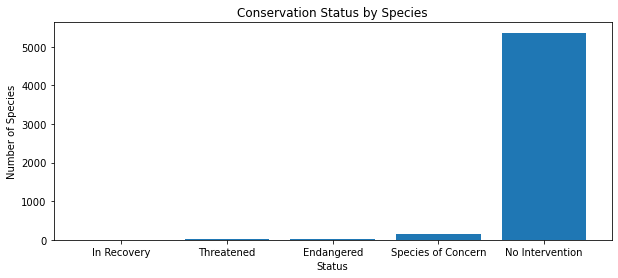

In [55]:
plt.figure(figsize=(10,4))
plt.bar(species_status['conservation_status'], species_status['scientific_name'])
plt.xlabel('Status')
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

# Step 4
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [58]:
protection = lambda entry: True if entry != 'No Intervention' else False
species['is_protected'] = species.conservation_status.apply(protection)
print(species.head(20))

   category                scientific_name                                       common_names conservation_status  is_protected
0    Mammal  Clethrionomys gapperi gapperi                           Gapper's Red-Backed Vole     No Intervention         False
1    Mammal                      Bos bison                              American Bison, Bison     No Intervention         False
2    Mammal                     Bos taurus  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention         False
3    Mammal                     Ovis aries  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention         False
4    Mammal                 Cervus elaphus                                      Wapiti Or Elk     No Intervention         False
5    Mammal         Odocoileus virginianus                                  White-Tailed Deer     No Intervention         False
6    Mammal                     Sus scrofa                                Feral Hog, Wild Pig     No Int

Let's group the `species` data frame by the `category` and `is_protected` columns and count the unique `scientific_name`s in each grouping.

Save your results to `category_counts`.

In [62]:
category_status = species.groupby(['category', 'is_protected']).scientific_name.count().reset_index()

Examine `category_counts` using `head()`.

In [64]:
print(category_status.head())

    category  is_protected  scientific_name
0  Amphibian         False               73
1  Amphibian          True                7
2       Bird         False              442
3       Bird          True               79
4       Fish         False              116


It's going to be easier to view this data if we pivot it.  Using `pivot`, rearange `category_counts` so that:
- `columns` is `is_protected`
- `index` is `category`
- `values` is `scientific_name`

Save your pivoted data to `category_pivot`. Remember to `reset_index()` at the end.

In [67]:
category_pivot = category_status.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

Examine `category_pivot`.

In [68]:
print(category_pivot)

is_protected           category  False  True
0                     Amphibian     73     7
1                          Bird    442    79
2                          Fish    116    11
3                        Mammal    176    38
4             Nonvascular Plant    328     5
5                       Reptile     74     5
6                Vascular Plant   4424    46


Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [71]:
category_pivot.rename(columns={False:'not_protected', True:'protected'}, inplace=True)
print(category_pivot)

is_protected           category  not_protected  protected
0                     Amphibian             73          7
1                          Bird            442         79
2                          Fish            116         11
3                        Mammal            176         38
4             Nonvascular Plant            328          5
5                       Reptile             74          5
6                Vascular Plant           4424         46


Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

In [72]:
category_pivot['percent_protected'] = category_pivot['protected'] / (category_pivot['not_protected'] + category_pivot['protected'])

Examine `category_pivot`.

In [73]:
print(category_pivot)

is_protected           category  not_protected  protected  percent_protected
0                     Amphibian             73          7           0.087500
1                          Bird            442         79           0.151631
2                          Fish            116         11           0.086614
3                        Mammal            176         38           0.177570
4             Nonvascular Plant            328          5           0.015015
5                       Reptile             74          5           0.063291
6                Vascular Plant           4424         46           0.010291


It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before you do the significance test, consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, you should choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

Create a table called `contingency` and fill it in with the correct numbers

In [170]:
contingency = [[category_pivot.loc[3,'protected'], category_pivot.loc[3,'not_protected']], [category_pivot.loc[1,'protected'], category_pivot.loc[1,'not_protected']]]
print(contingency)

[[38, 176], [79, 442]]


In order to perform our chi square test, we'll need to import the correct function from scipy.  Past the following code and run it:
```py
from scipy.stats import chi2_contingency
```

In [171]:
from scipy.stats import chi2_contingency

Now run `chi2_contingency` with `contingency`.

In [173]:
chi_stat, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.445901703047197


It looks like this difference isn't significant!

Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [174]:
contingency = [[category_pivot.loc[3,'protected'], category_pivot.loc[3,'not_protected']], [category_pivot.loc[5,'protected'], category_pivot.loc[5,'not_protected']]]
chi_stat, pval, dof, expected = chi2_contingency(contingency)
print(pval)

0.02338465214871547


Yes! It looks like there is a significant difference between `Reptile` and `Mammal`!

# Step 5


Conservationists have been recording sightings of different species at several national parks for the past 7 days.  They've saved sent you their observations in a file called `observations.csv`.  Load `observations.csv` into a variable called `observations`, then use `head` to view the data.

In [176]:
observations = pd.read_csv('observations.csv')
print(observations)

                               scientific_name                            park_name  observations
0                           Vicia benghalensis  Great Smoky Mountains National Park            68
1                               Neovison vison  Great Smoky Mountains National Park            77
2                            Prunus subcordata               Yosemite National Park           138
3                         Abutilon theophrasti                  Bryce National Park            84
4                     Githopsis specularioides  Great Smoky Mountains National Park            85
...                                        ...                                  ...           ...
23291                     Croton monanthogynus               Yosemite National Park           173
23292                 Otospermophilus beecheyi                  Bryce National Park           130
23293  Heterotheca sessiliflora ssp. echioides                  Bryce National Park           140
23294               

Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.  Notice that the following code will tell us whether or not a word occurs in a string:

In [1]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [2]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [193]:
species['is_sheep'] = species.common_names.apply(lambda entry:'Sheep' in entry )
print(species.columns.values)

['scientific_name' 'park_name' 'observations' 'is_sheep']


Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [204]:
print(species[species.is_sheep == True])

            category              scientific_name                                       common_names conservation_status  is_protected  is_sheep
3             Mammal                   Ovis aries  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention         False      True
1139  Vascular Plant             Rumex acetosella                        Sheep Sorrel, Sheep Sorrell     No Intervention         False      True
2233  Vascular Plant           Festuca filiformis                              Fineleaf Sheep Fescue     No Intervention         False      True
3014          Mammal              Ovis canadensis                       Bighorn Sheep, Bighorn Sheep  Species of Concern          True      True
3758  Vascular Plant             Rumex acetosella  Common Sheep Sorrel, Field Sorrel, Red Sorrel,...     No Intervention         False      True
3761  Vascular Plant            Rumex paucifolius   Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock     No Intervention         F

Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [205]:
sheep_species = species[(species.is_sheep == True)&(species.category == 'Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [206]:
sheep_observations = observations.merge(sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True


How many total sheep observations (across all three species) were made at each national park?  Use `groupby` to get the `sum` of `observations` for each `park_name`.  Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [211]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Create a bar chart showing the different number of observations per week at each park.

1. Start by creating a wide figure with `figsize=(16, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `park_name` in `obs_by_park`
5. Label the y-axis `Number of Observations`
6. Title the graph `Observations of Sheep per Week`
7. Plot the grap using `plt.show()`

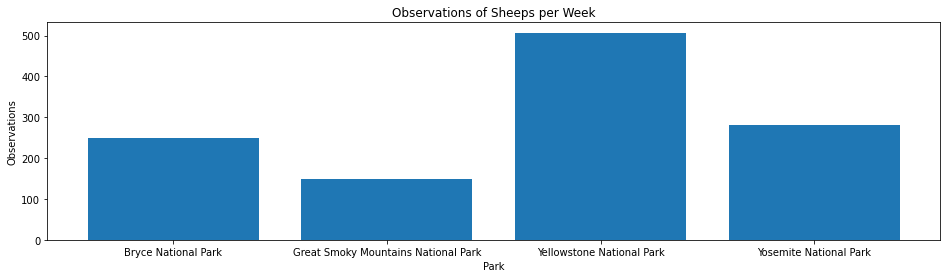

In [213]:
plt.figure(figsize=(16,4))
plt.bar(obs_by_park['park_name'], obs_by_park['observations'])
plt.xlabel('Park')
plt.ylabel('Observations')
plt.title('Observations of Sheeps per Week')
plt.show()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage points.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use <a href="https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html">Codecademy's sample size calculator</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [ ]:
sample_size = 870

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [215]:
bryce_weeks_to_goal = 870/250
yellowstone_weeks_to_goal = 870/507
print(bryce_weeks_to_goal, yellowstone_weeks_to_goal)

3.48 1.7159763313609468
